<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/ZSCORE_ANNUALISED_UNIQUE_STOCK_GOOD_ONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-894974060.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Analyzed period: 2005-11-17 → 2025-10-15
Days Above Mean (Z>0): 2810
Days Below Mean (Z<0): 2198


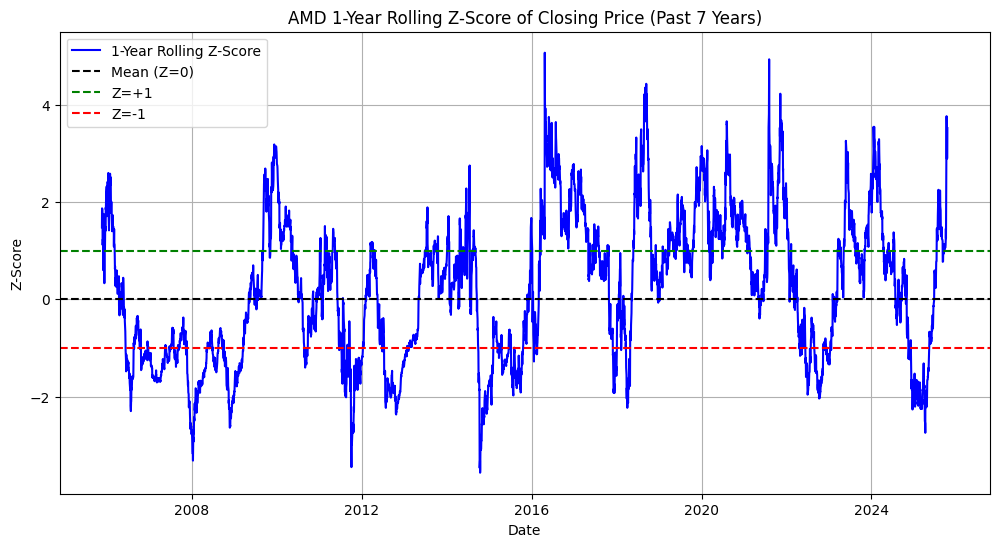

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# --- Step 1: Download 7 years of NFLX data ---
ticker = "AMD"
end_date = datetime.today()
start_date = end_date - timedelta(days=20*365)
data = yf.download(ticker, start=start_date, end=end_date)

# --- Step 2: Ensure 'Close' column exists ---
if 'Close' not in data.columns:
    raise KeyError("No 'Close' column found in the downloaded data.")

close_prices = data['Close']

# --- Step 3: Compute 1-year rolling mean and std (≈252 trading days) ---
window = 252
rolling_mean = close_prices.rolling(window=window, min_periods=20).mean()
rolling_std = close_prices.rolling(window=window, min_periods=20).std()

# --- Step 4: Calculate rolling Z-score safely ---
data['Z-Score'] = (close_prices - rolling_mean) / rolling_std

# --- Step 5: Drop rows where Z-score could not be computed ---
data = data.loc[data['Z-Score'].notna()].copy()

# --- Step 6: Separate above/below mean (Z=0) ---
above_mean = data[data['Z-Score'] > 0]
below_mean = data[data['Z-Score'] < 0]

# --- Step 7: Display summary ---
print(f"Analyzed period: {data.index.min().date()} → {data.index.max().date()}")
print(f"Days Above Mean (Z>0): {len(above_mean)}")
print(f"Days Below Mean (Z<0): {len(below_mean)}")

# --- Step 8: Plot ---
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Z-Score'], label='1-Year Rolling Z-Score', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Mean (Z=0)')
plt.axhline(1, color='green', linestyle='--', label='Z=+1')
plt.axhline(-1, color='red', linestyle='--', label='Z=-1')
plt.title(f'{ticker} 1-Year Rolling Z-Score of Closing Price (Past 7 Years)')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()
